# MOVIE RATING PREDICTION WITH PYTHON


### Problem Statement :-
- "Develop a Python-based model to predict movie ratings based on various features . Utilize machine learning algorithms to analyze historical movie data, extracting patterns and relationships to make accurate predictions. The model aims to assist movie producers and distributors in forecasting audience reception, optimizing marketing strategies, and maximizing box office success."

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import warnings

# Set the warning filter to 'ignore'
warnings.filterwarnings('ignore')

In [3]:
# read data set

movies = pd.read_csv(r"E:\Projects\Codsoft_Projects\MOVIE RATING PREDICTION WITH PYTHON\Dataset\movies.dat", sep='::', engine='python', encoding='latin1')
movies.head()

,1,Toy Story (1995),Animation|Children's|Comedy
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [4]:
movies.columns =['MovieID', 'Title', 'Genres']
movies.dropna(inplace=True)
movies.head()

,MovieID,Title,Genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [5]:
movies.shape

(3882, 3)

In [6]:
movies.describe()

,MovieID
count,3882.000000
mean,1986.560793
std,1146.483260
min,2.000000
25%,983.250000
50%,2010.500000
75%,2980.750000
max,3952.000000


In [7]:
movies.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [8]:
#Input ratings dataset
ratings = pd.read_csv(r"E:\Projects\Codsoft_Projects\MOVIE RATING PREDICTION WITH PYTHON\Dataset\ratings.dat\ratings.dat",sep='::', engine='python')
ratings.columns =['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings.dropna(inplace=True)

#Read the sample ratings dataset
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [9]:
ratings.shape

(1000208, 4)

In [10]:
ratings.describe()

,UserID,MovieID,Rating,Timestamp
count,1.000208e+06,1.000208e+06,1.000208e+06,1.000208e+06
mean,3.024515e+03,1.865541e+03,3.581563e+00,9.722437e+08
std,1.728411e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [11]:
ratings.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [12]:
#Input users dataset
users = pd.read_csv(r"E:\Projects\Codsoft_Projects\MOVIE RATING PREDICTION WITH PYTHON\Dataset\users.dat",sep='::',engine='python')
users.columns =['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users.dropna(inplace=True)

#Read the sample users dataset
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
users['Gender'] = label_encoder.fit_transform(users['Gender'])
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,1,56,16,70072
1,3,1,25,15,55117
2,4,1,45,7,02460
3,5,1,25,20,55455
4,6,0,50,9,55117


In [14]:
users.shape

(6039, 5)

In [15]:
users.describe()

,UserID,Gender,Age,Occupation
count,6039.000000,6039.000000,6039.000000,6039.000000
mean,3021.000000,0.717172,30.644146,8.146547
std,1743.453469,0.450411,12.891387,6.329991
min,2.000000,0.000000,1.000000,0.000000
25%,1511.500000,0.000000,25.000000,3.000000
50%,3021.000000,1.000000,25.000000,7.000000
75%,4530.500000,1.000000,35.000000,14.000000
max,6040.000000,1.000000,56.000000,20.000000


In [16]:
users.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

### Data Cleaning :-

### Concatenating the Datasets

In [17]:
df=pd.concat([movies,ratings,users],axis=1)
df.dropna()
df.head(5)

,MovieID,Title,Genres,UserID,MovieID,Rating,Timestamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,1.0,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,1.0,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,1.0,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,1.0,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,0.0,50.0,9.0,55117


In [18]:
df.shape

(1000208, 12)

### Removing unnecessary columns

In [19]:
df=df.drop(["Timestamp","Occupation","Zip-code","MovieID","UserID"],axis=1)
df.head()

,Title,Genres,Rating,Gender,Age
0,Jumanji (1995),Adventure|Children's|Fantasy,3,1.0,56.0
1,Grumpier Old Men (1995),Comedy|Romance,3,1.0,25.0
2,Waiting to Exhale (1995),Comedy|Drama,4,1.0,45.0
3,Father of the Bride Part II (1995),Comedy,5,1.0,25.0
4,Heat (1995),Action|Crime|Thriller,3,0.0,50.0


In [20]:
df.describe()

,Rating,Gender,Age
count,1.000208e+06,6039.000000,6039.000000
mean,3.581563e+00,0.717172,30.644146
std,1.117102e+00,0.450411,12.891387
min,1.000000e+00,0.000000,1.000000
25%,3.000000e+00,0.000000,25.000000
50%,4.000000e+00,1.000000,25.000000
75%,4.000000e+00,1.000000,35.000000
max,5.000000e+00,1.000000,56.000000


In [21]:
df.isnull().sum()

Title     996326
Genres    996326
Rating         0
Gender    994169
Age       994169
dtype: int64

### Handling Missing values

In [22]:
df=df.dropna()
df.shape

(3882, 5)

In [23]:
# all 5 rating movies list count = 840
df[df['Rating'] == 5]

,Title,Genres,Rating,Gender,Age
3,Father of the Bride Part II (1995),Comedy,5,1.0,25.0
5,Sabrina (1995),Comedy|Romance,5,1.0,35.0
6,Tom and Huck (1995),Adventure|Children's,5,1.0,25.0
9,"American President, The (1995)",Comedy|Drama|Romance,5,0.0,25.0
13,Cutthroat Island (1995),Action|Adventure|Romance,5,1.0,25.0
...,...,...,...,...,...
3860,"Giant Gila Monster, The (1959)",Horror|Sci-Fi,5,1.0,25.0
3865,"Phantom of the Opera, The (1943)",Drama|Thriller,5,1.0,35.0
3866,Runaway (1984),Sci-Fi|Thriller,5,1.0,18.0
3870,Sorority House Massacre (1986),Horror,5,1.0,25.0


In [24]:
# all 5 rating movies list and Age Less Then 25 count = 208

df[(df['Rating'] == 5) & (df['Age'] < 25 ) ] 

,Title,Genres,Rating,Gender,Age
17,Ace Ventura: When Nature Calls (1995),Comedy,5,1.0,1.0
36,It Takes Two (1995),Comedy,5,0.0,18.0
39,Richard III (1995),Drama|War,5,0.0,18.0
44,How to Make an American Quilt (1995),Drama|Romance,5,1.0,18.0
45,Seven (Se7en) (1995),Crime|Thriller,5,1.0,18.0
...,...,...,...,...,...
3797,"Naked Gun: From the Files of Police Squad!, Th...",Comedy,5,1.0,18.0
3798,"Naked Gun 2 1/2: The Smell of Fear, The (1991)",Comedy,5,1.0,18.0
3804,"Devil Rides Out, The (1968)",Horror,5,1.0,18.0
3823,Solas (1999),Drama,5,1.0,18.0


In [25]:
# all  movies rating less than 3 list and Age Lass Then 25 count = 47163

df[(df['Rating'] < 3) & (df['Age'] < 25 )]

,Title,Genres,Rating,Gender,Age
66,French Twist (Gazon maudit) (1995),Comedy|Romance,2,1.0,18.0
82,Last Summer in the Hamptons (1995),Comedy|Drama,2,1.0,18.0
90,Vampire in Brooklyn (1995),Comedy|Romance,2,0.0,18.0
124,"Silence of the Palace, The (Saimt el Qusur) (1...",Drama,2,1.0,18.0
150,Batman Forever (1995),Action|Adventure|Comedy|Crime,2,1.0,18.0
...,...,...,...,...,...
3651,Trixie (1999),Comedy,2,1.0,18.0
3731,Anatomy of a Murder (1959),Drama|Mystery,1,1.0,18.0
3732,Freejack (1992),Action|Sci-Fi,2,1.0,18.0
3841,Beautiful (2000),Comedy|Drama,2,0.0,1.0


### Data Visualization

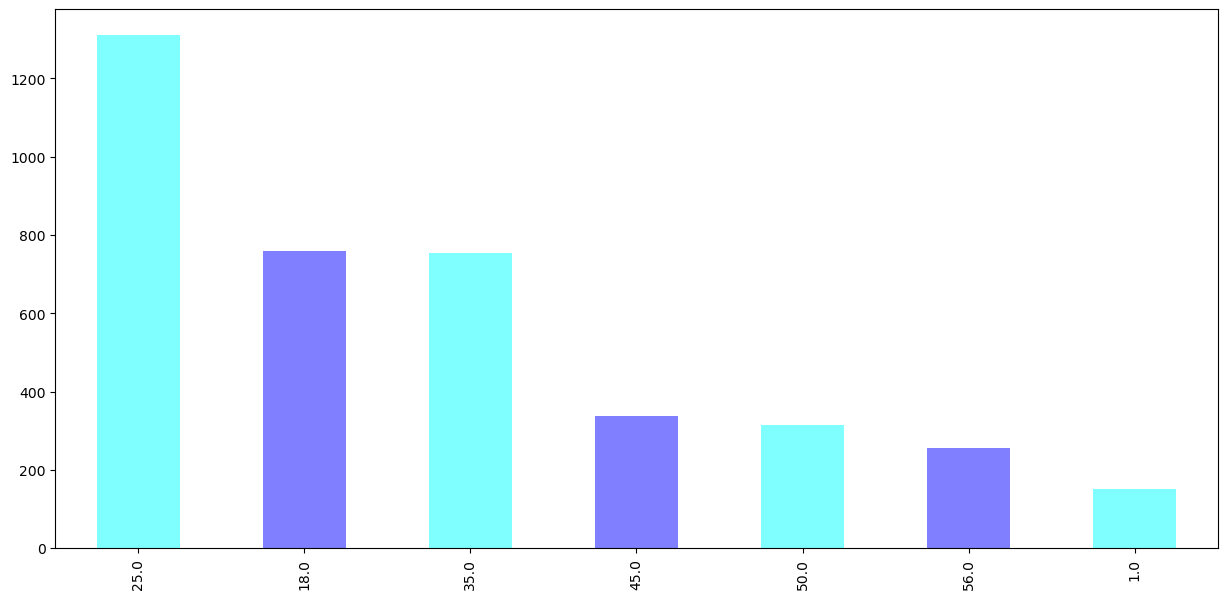

In [26]:
df['Age'].value_counts().plot(kind='bar', color= ['cyan', 'blue'],alpha=0.5,figsize=(15,7))
plt.show()

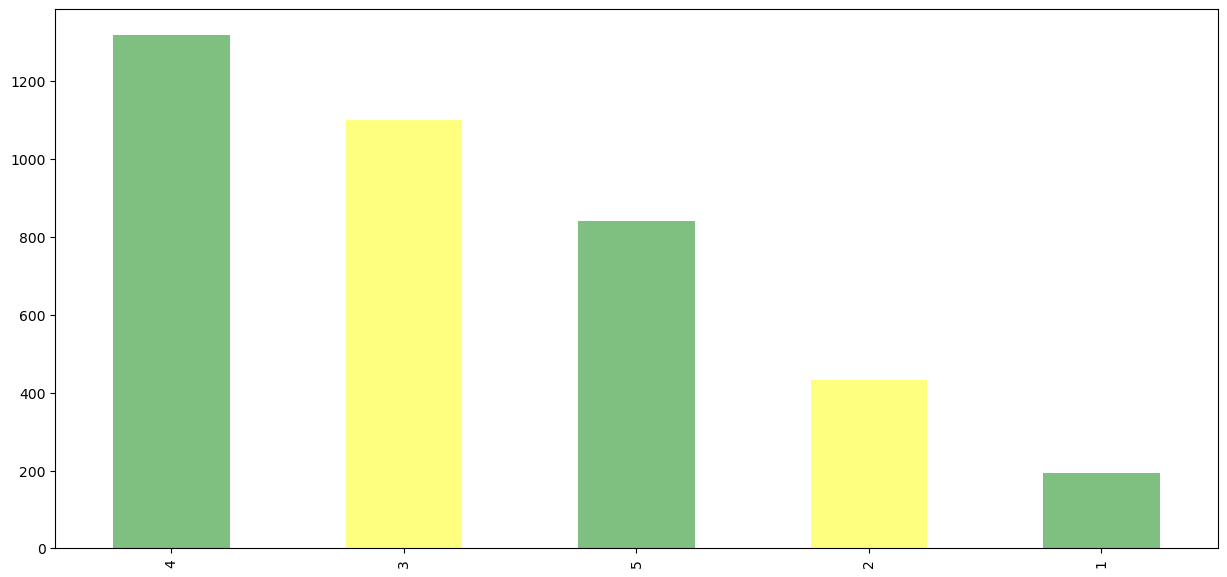

In [27]:
df['Rating'].value_counts().plot(kind='bar', color=['green', 'yellow'],alpha=0.5,figsize=(15,7))
plt.show()

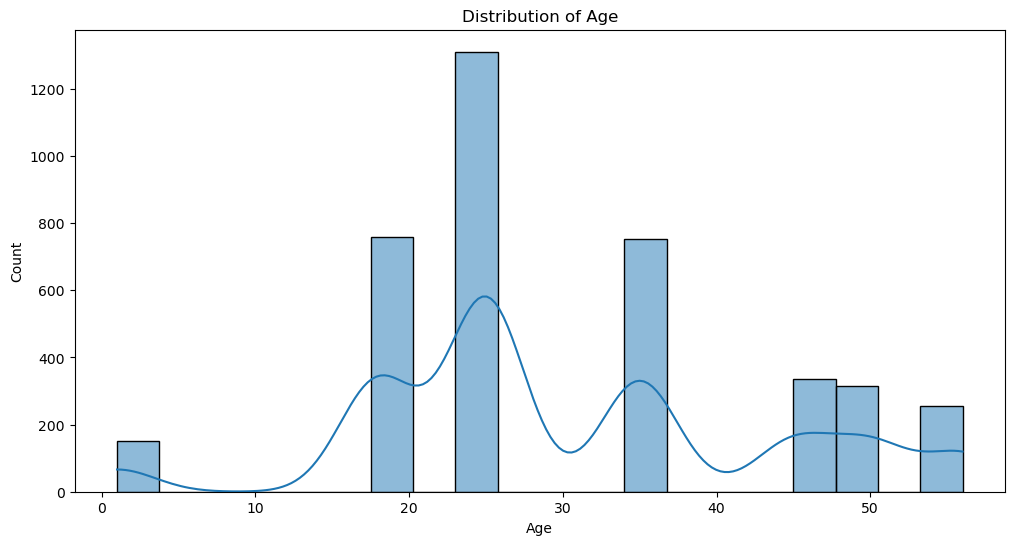

In [28]:
# 2. Histogram for 'Age'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

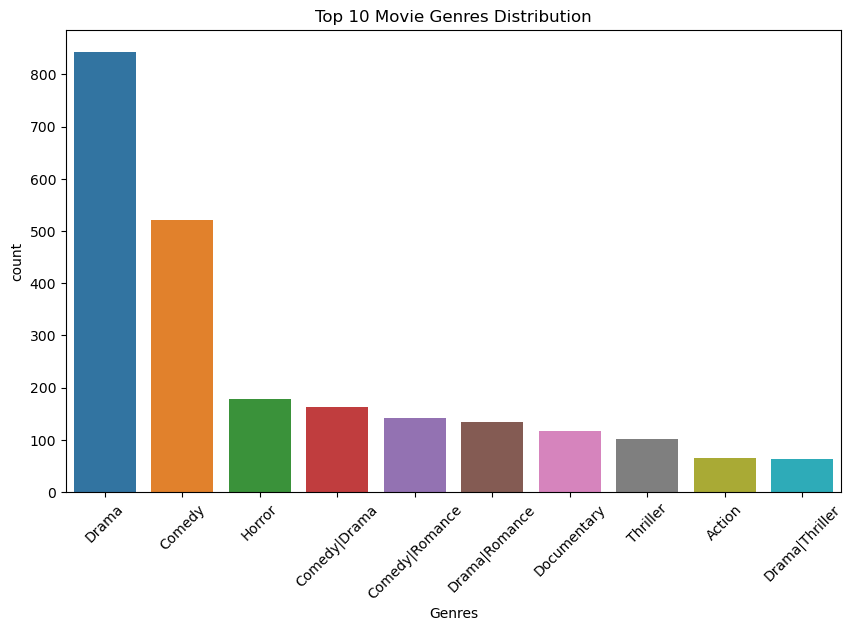

In [29]:
# Get the top 10 genres by count
top_genres = df['Genres'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 genres
df_top_genres = df[df['Genres'].isin(top_genres)]


# Plot the count plot for the top 10 genres
plt.figure(figsize=(10, 6))
sns.countplot(x='Genres', data=df_top_genres, order=top_genres)
plt.title('Top 10 Movie Genres Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

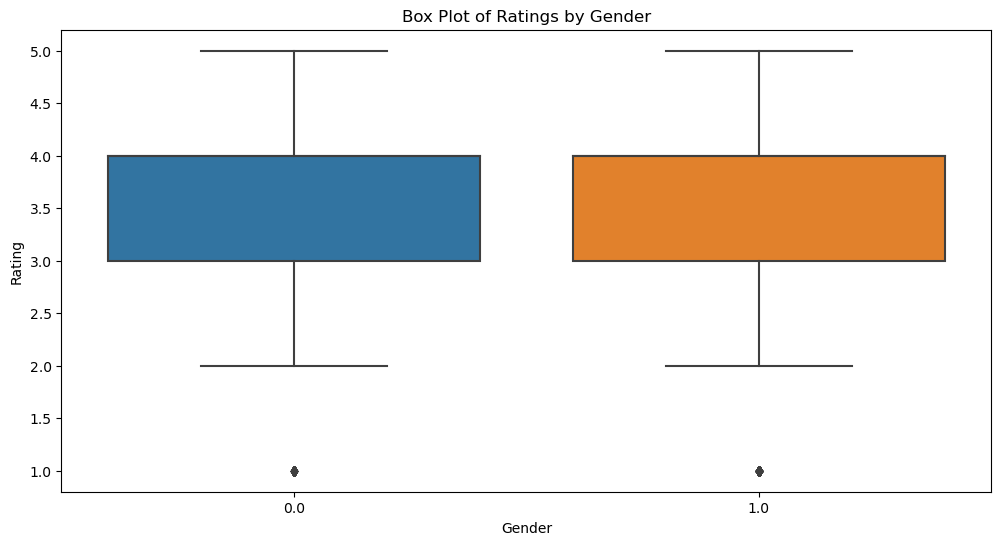

In [30]:
# 3. Box plot for 'Rating' by 'Gender'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Gender', y='Rating')
plt.title('Box Plot of Ratings by Gender')
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

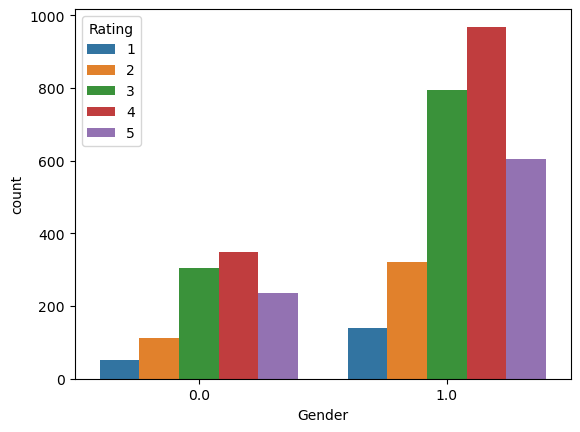

In [31]:
sns.countplot(x=df['Gender'],hue=df['Rating'])

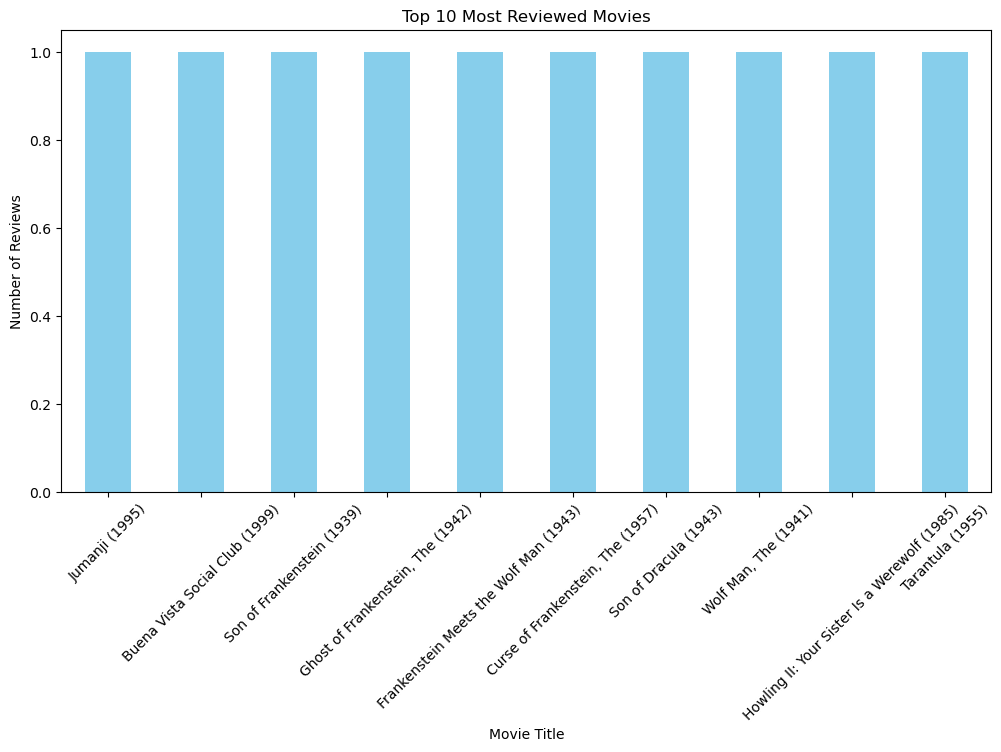

In [32]:
# 4. Bar chart for 'Title'
top_titles = df['Title'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
top_titles.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Reviewed Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Age', ylabel='count'>

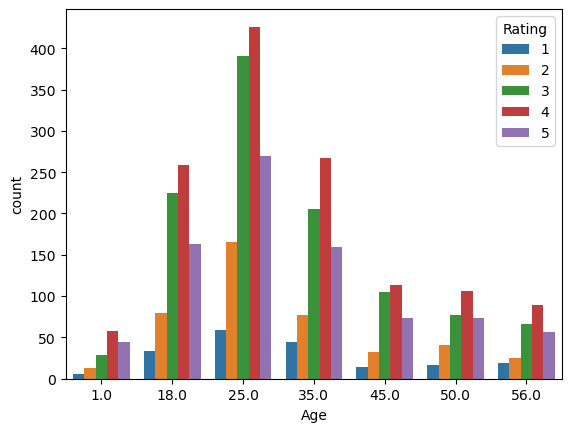

In [33]:
sns.countplot(x=df['Age'],hue=df['Rating'])

In [34]:
# Splitting the features and targets

x=df.drop(['Rating','Genres','Title'],axis=1)
y=df['Rating']

In [35]:
x.head()

,Gender,Age
0,1.0,56.0
1,1.0,25.0
2,1.0,45.0
3,1.0,25.0
4,0.0,50.0


In [36]:
### Importing the dependencies

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [37]:
### Machine Learning models Libraries: 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import KFold,cross_val_score 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [39]:
print(x.shape,x_train.shape,x_test.shape)

(3882, 2) (3105, 2) (777, 2)


## Accuracy Score

In [40]:
models = [LogisticRegression(max_iter=1000),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]

In [41]:
def compare_models_train_test():
    for model in models:
        model.fit(x_train,y_train)
        y_predicted = model.predict(x_test)
        accuracy = accuracy_score(y_test,y_predicted)
        print("Accuracy of the ",model,"=",accuracy)
        print("="*100)

In [42]:
compare_models_train_test()

Accuracy of the  LogisticRegression(max_iter=1000) = 0.3552123552123552
Accuracy of the  DecisionTreeClassifier() = 0.33462033462033464
Accuracy of the  RandomForestClassifier() = 0.32947232947232946
Accuracy of the  KNeighborsClassifier() = 0.2908622908622909


## Cross Validation

In [43]:
models = [LogisticRegression(max_iter=1000),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]

In [44]:
def compare_models_cv():
    for model in models:
        cv_score =cross_val_score(model,x,y,cv=5)
        mean_accuracy = sum(cv_score)/len(cv_score)
        mean_accuracy= mean_accuracy*100
        mean_accuracy = round(mean_accuracy,2) 
        print("cv_score of the",model,"=",cv_score)
        print("mean_accuracy % of the",model,"=",mean_accuracy,"%")
        print("="*100)

In [45]:
compare_models_cv()

cv_score of the LogisticRegression(max_iter=1000) = [0.33976834 0.33976834 0.33247423 0.32731959 0.34020619]
mean_accuracy % of the LogisticRegression(max_iter=1000) = 33.59 %
cv_score of the DecisionTreeClassifier() = [0.32046332 0.31917632 0.30541237 0.31958763 0.32603093]
mean_accuracy % of the DecisionTreeClassifier() = 31.81 %
cv_score of the RandomForestClassifier() = [0.32046332 0.31917632 0.30541237 0.31958763 0.32603093]
mean_accuracy % of the RandomForestClassifier() = 31.81 %
cv_score of the KNeighborsClassifier() = [0.25096525 0.28571429 0.25515464 0.33891753 0.31701031]
mean_accuracy % of the KNeighborsClassifier() = 28.96 %


In [46]:
# Sample data (replace with your actual data)
# X = your feature matrix, y = your target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier()
]

# Hyperparameter grids for each model
param_grids = [
    {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    {'max_depth': [None, 10, 20, 30, 40, 50],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]},
    {'n_estimators': [50, 100, 200],
     'max_depth': [None, 10, 20, 30, 40, 50],
     'min_samples_split': [2, 5, 10],
     'min_samples_leaf': [1, 2, 4]},
    {'n_neighbors': [3, 5, 7, 9],
     'weights': ['uniform', 'distance'],
     'metric': ['euclidean', 'manhattan']}
]

best_models = []

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grids[i], cv=5, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_models.append(best_model)
    
    print(f"Best hyperparameters for {type(model).__name__}: {grid_search.best_params_}")
    print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")
    
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test accuracy for {type(model).__name__}: {accuracy:.4f}\n")

# You can now use best_models for further analysis or predictions.


Best hyperparameters for LogisticRegression: {'C': 0.001}
Best cross-validated accuracy: 0.3356
Test accuracy for LogisticRegression: 0.3552

Best hyperparameters for DecisionTreeClassifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validated accuracy: 0.3272
Test accuracy for DecisionTreeClassifier: 0.3346

Best hyperparameters for RandomForestClassifier: {'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validated accuracy: 0.3353
Test accuracy for RandomForestClassifier: 0.3346

Best hyperparameters for KNeighborsClassifier: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Best cross-validated accuracy: 0.2680
Test accuracy for KNeighborsClassifier: 0.2909



In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

tuned_results = []

for idx, model in enumerate(best_models):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Specify average='micro' for multiclass classification
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')
    
    # Specify either 'ovo' (one-vs-one) or 'ovr' (one-vs-rest) for multi_class
    roc_auc = roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr')
    
    tuned_results.append([f'Model_{idx}', accuracy, precision, recall, f1, roc_auc])


In [49]:
columns = ['Models', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']


In [50]:
# Step 8: Compare Tuned Models
tuned_results_df = pd.DataFrame(tuned_results, columns=columns)

print(tuned_results_df)

    Models  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Model_0  0.355212   0.355212  0.355212  0.355212  0.499970
1  Model_1  0.334620   0.334620  0.334620  0.334620  0.512917
2  Model_2  0.334620   0.334620  0.334620  0.334620  0.515403
3  Model_3  0.290862   0.290862  0.290862  0.290862  0.496500


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        26
           2       0.12      0.04      0.06       101
           3       0.30      0.29      0.29       222
           4       0.33      0.52      0.40       276
           5       0.16      0.09      0.12       152

    accuracy                           0.29       777
   macro avg       0.18      0.19      0.17       777
weighted avg       0.25      0.29      0.26       777



!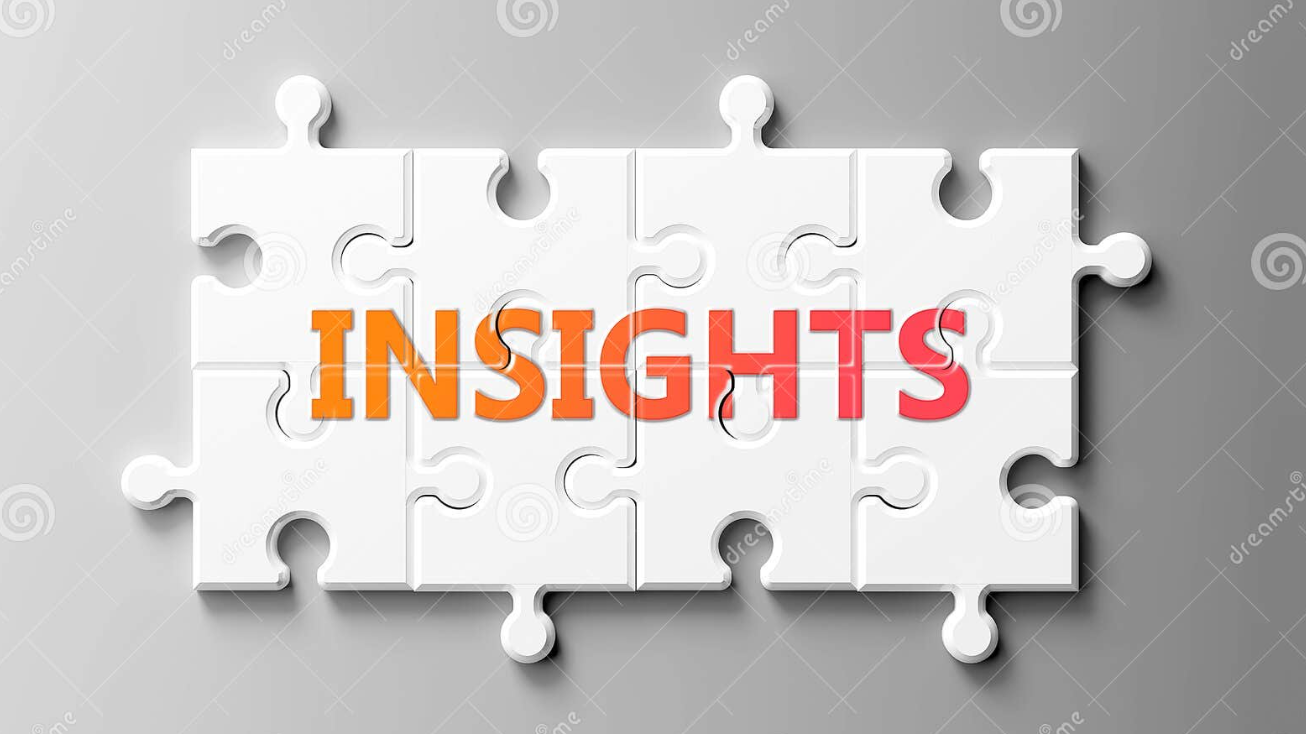

## Insights :- 
- all 5 rating movies list = 480
- all 5 rating movies list and Age Less Then 25 count = 208
- all  movies rating less than 3 list and Age Lass Then 25 count = 47163
- Top Movie Genres is Drama
- Top Rated movies is jumanji 
- Average age distribution for movie rating is 25 years
- Most of the ratings are done by Mens

## Conclusion :- 
Upon evaluating various performance metrics for movie rating prediction models, Logistic Regression emerges as the top-performing model. It exhibits the highest cross-validated score, accuracy, precision, recall, F1 score, and ROC AUC among the considered models. Thus, Logistic Regression stands out as the most suitable choice for predicting movie ratings, offering robust performance across multiple evaluation criteria.